<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Parcial3-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJ 3

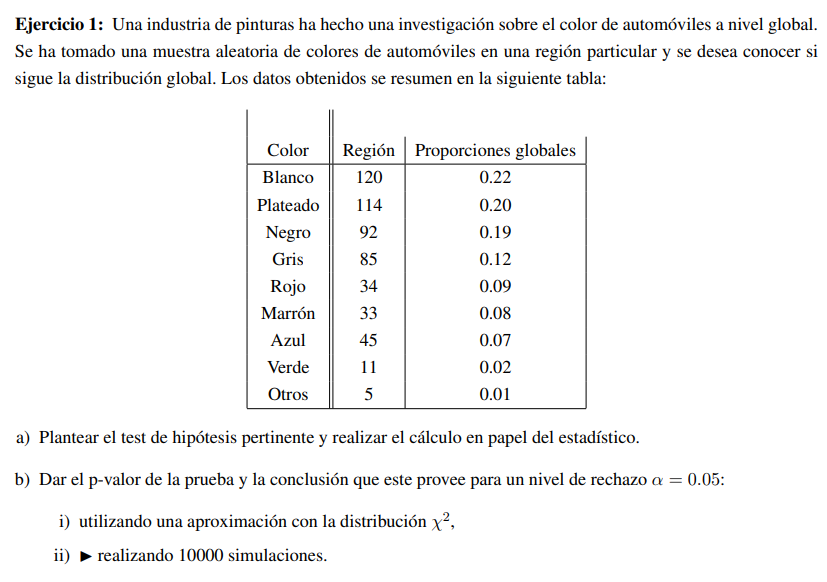

## a)

La hipotesis nula es:

$$
H_0 = \text{ la muestra proviene de la variable Y tal que} \\
P( Y = \text{Blanco}) = 0.22 \\
P( Y = \text{Plateado}) = 0.20 \\
P( Y = \text{Negro}) = 0.19 \\
P( Y = \text{Gris}) = 0.12 \\
P( Y = \text{Rojo}) = 0.09 \\
P( Y = \text{Marron}) = 0.08 \\
P( Y = \text{Azul}) = 0.07 \\
P( Y = \text{Verde}) = 0.02 \\
P( Y = \text{Otros}) = 0.01 \\
$$

In [3]:
#@title Estadistico de Pearson
import numpy as np

def estadistico_pearson(frecuencias, p_hip_0, cant_valores):
    assert sum(frecuencias) == cant_valores
    assert len(frecuencias) == len(p_hip_0)

    valores_esperados = np.array([cant_valores*p for p in p_hip_0])
    return np.sum((frecuencias - valores_esperados) ** 2 / valores_esperados)

FRECUENCIAS_MUESTRA = [120, 114, 92, 85, 34, 33, 45, 11, 5]
PROB_HIP_0 = [0.22, 0.20, 0.19, 0.12, 0.09, 0.08, 0.07, 0.02, 0.01]
TAMANO_MUESTRA = sum(FRECUENCIAS_MUESTRA)

t_0 = estadistico_pearson(FRECUENCIAS_MUESTRA, PROB_HIP_0, TAMANO_MUESTRA)
print(f"t_0: {t_0:.16f}")

t_0: 15.9643099850599111


## b)

In [6]:
#@title i)
from scipy.stats import chi2


print(f"p-valor: {1 - chi2.cdf(t_0, len(PROB_HIP_0)-1):.8f}")

p-valor: 0.99898022


In [7]:
#@title ii) v1
import numpy as np


def ej1b_p_valor_v1(tam_muestra, t_0, ps, n_sim):
    cant_valores = len(ps)

    # Abstraemos los valores posibles a [0, 1, ...]
    valores_posibles = list(range(cant_valores))

    # Dado que los valores esperados son constantes los calculamos
    valores_esperados = np.array([tam_muestra*p for p in ps])

    p_valor = 0
    for _ in range(n_sim):
        # Generamos una muestra
        muestra = np.random.choice(a=valores_posibles, p=ps, size=tam_muestra)

        # Contamos las frecuencias
        N_i = np.bincount(muestra, minlength=cant_valores)

        # Calculamos el estadistico de pearson
        T = np.sum((N_i - valores_esperados) ** 2 / valores_esperados)

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej1b_p_valor_v1(TAMANO_MUESTRA, t_0, PROB_HIP_0, 10_000)

0.999

In [9]:
#@title ii) v2
import numpy as np
from random import random


def gen_binomial(n,p):
    c = p / (1 - p)
    prob = (1 - p) ** n
    F = prob; i=0
    U = random()
    while U >= F:
        prob *= c * (n-i) / (i+1)
        F += prob
        i += 1
    return i


def ej1b_p_valor_v2(tam_muestra, t_0, ps, n_sim):
    # Dado que los valores esperados son constantes los calculamos
    valores_esperados = np.array([tam_muestra*p for p in ps])

    # Dado que estos valores son fijos, no los calculo en cada iteracion
    # y el ultimo valor tampoco porque ya sabemos que es 1
    ps_ajustados = [ps[i] / (1 - sum(ps[:i])) for i in range(len(ps)-1)]

    p_valor = 0
    for _ in range(n_sim):

        # Calculo de las binomiales
        N_i, n_restante = [], tam_muestra
        for ps_i in ps_ajustados:
            x = gen_binomial(n_restante, ps_i)
            N_i.append(x)
            n_restante -= x
        N_i.append(n_restante) # Último valor

        # Calculamos el estadistico de pearson
        T = np.sum((N_i - valores_esperados) ** 2 / valores_esperados)

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej1b_p_valor_v2(TAMANO_MUESTRA, t_0, PROB_HIP_0, 10_000)

0.999

# EJ 2

Es del estilo del paracial 2.

# EJ 3

En papel.

# EJ 4

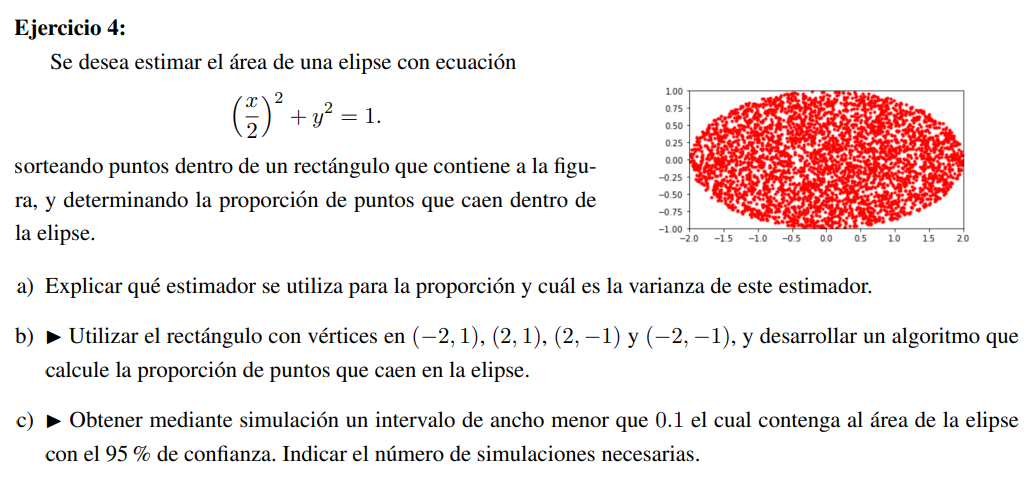

In [31]:
%reset -f

In [32]:
#@title b)
from random import random

X_MIN, X_MAX = -2, 2
Y_MIN, Y_MAX = -1, 1
AREA_RECTANGULO = 4*2


def punto_aleatorio():
    return random()*4-2, random()*2-1


def experimento():
    x, y = punto_aleatorio()
    return 1 if (x/2)**2 + y**2 <= 1 else 0


def estimar_media_muestral(n_sim):
    return sum(experimento() for _ in range(n_sim)) / n_sim

proporcion = estimar_media_muestral(10_000)
print(f"proporcion: {proporcion}")
print(f"area: {proporcion * AREA_RECTANGULO}")

proporcion: 0.7849
area: 6.2792


In [45]:
#@title c)
from random import random
from numpy import sqrt

def estimadores_ej4(z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    media = experimento()  # Primer valor de X
    var_acumulada = 0.0    # Varianza acumulada (S^2)
    n = 1                  # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = experimento()

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    estimacion = media * AREA_RECTANGULO
    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, estimacion, n

In [48]:
#@title Resultado
from scipy.stats import norm


confianza = 0.95
alfa = 1 - confianza
z_alfa_2 = abs(norm.ppf(alfa/ 2))
ancho_intervalo = 0.1

print("\n" + " Resultado de la simulación ".center(70, "-"))
print(f"{'n_sim':>10} | {'media':^10} | {'IC (95%)':^16} | {'Long. IC':^10} | {'Estimacion':^10}")
print("-" * 70)
media, _, intervalo, estimacion, n = estimadores_ej4(z_alfa_2, ancho_intervalo)
long_ic = intervalo[1] - intervalo[0]
print(f"{n:>10} | {media:^10.4f} | ({intervalo[0]:.4f}, {intervalo[1]:.4f}) | {long_ic:^10.4f} | {estimacion:^10.4f}")
print("-" * 70)


--------------------- Resultado de la simulación ---------------------
     n_sim |   media    |     IC (95%)     |  Long. IC  | Estimacion
----------------------------------------------------------------------
       277 |   0.7653   | (0.7153, 0.8153) |   0.1000   |   6.1227  
----------------------------------------------------------------------
